# Author: Faique Ali

## Task 03 : Exploratory Data Analysis - Retail
<ul>
    <li>From the given <b>SampleSuperstore</b> dataset, perform 'Exploratory Data Analysis.</li>
    <li>As a business manager, try to find out the weak areas where you can work to make more profit.</li>
    <li>What all business problems you can derive by exploring the data?</li>
</ul>

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# Constants

In [40]:
DATASET_PATH = 'SampleSuperstore.csv'

BAR_CHART_TITLE = 'Category VS Sub Category'
LBL_SUB_CATEGORY = 'Sub-Category'
LBL_CATEGORY = 'Category'

TITLE_SALES_SUMMARY = 'Overall Sales Summary'
TITLE_PROFIT_BY_CAT = 'Overall Profit By Category'

# Step1: Gather the Data

In [3]:
# Load the dataset
data = pd.read_csv(DATASET_PATH)

# Show first 10 values
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [4]:
data.shape

(9994, 13)

#### Checking for the null-values in the dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
data.isna().sum().to_frame('Null Values')

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [7]:
# Statistics of the Data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Checking for the duplication in the data

In [8]:
data.duplicated().sum()

17

In [9]:
# Dropping the duplication
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(9977, 13)

#### Checking for unique values

In [11]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Deleting the 'Postal Code' variable

In [12]:
col = ['Postal Code']
data1 = data.drop(columns=col, axis=1)

### Correlation between variables

In [13]:
data1.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


### Covariance of columns

In [14]:
data1.cov()

,Sales,Quantity,Discount,Profit
Sales,389028.396022,278.765576,-3.645637,70057.067126
Quantity,278.765576,4.958001,0.003990,34.565743
Discount,-3.645637,0.003990,0.042624,-10.632751
Profit,70057.067126,34.565743,-10.632751,54970.478824


# Step2: Data Visualization

### Plotting Correlation between the variables (Heat Map)

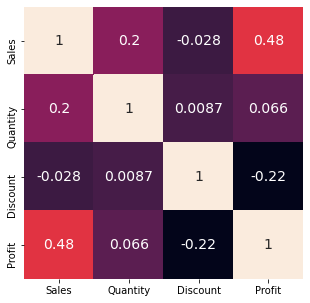

In [15]:
# Setting plot size
plt.figure(figsize=(5,5))
sns.heatmap(data1.corr(), annot=True, cbar=False, annot_kws={'size': 14})
plt.show()

### Pair Plot of 'Ship Mode'

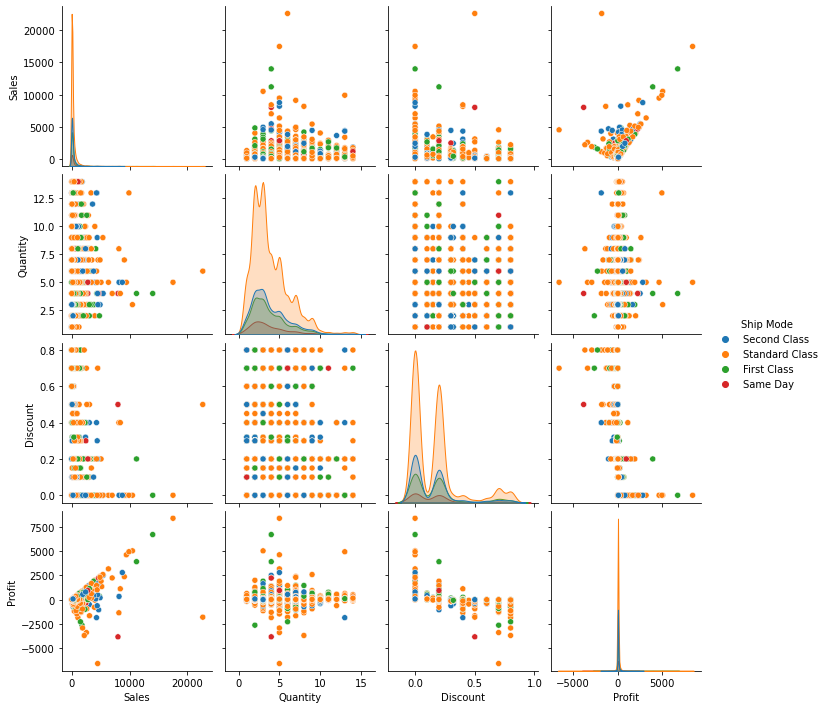

In [16]:
sns.pairplot(data1, hue='Ship Mode')

In [17]:
data1['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

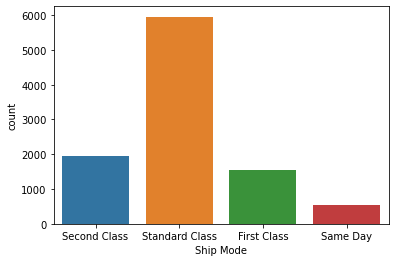

In [18]:
sns.countplot(x=data1['Ship Mode'])

### Pair Plot of 'Segment'

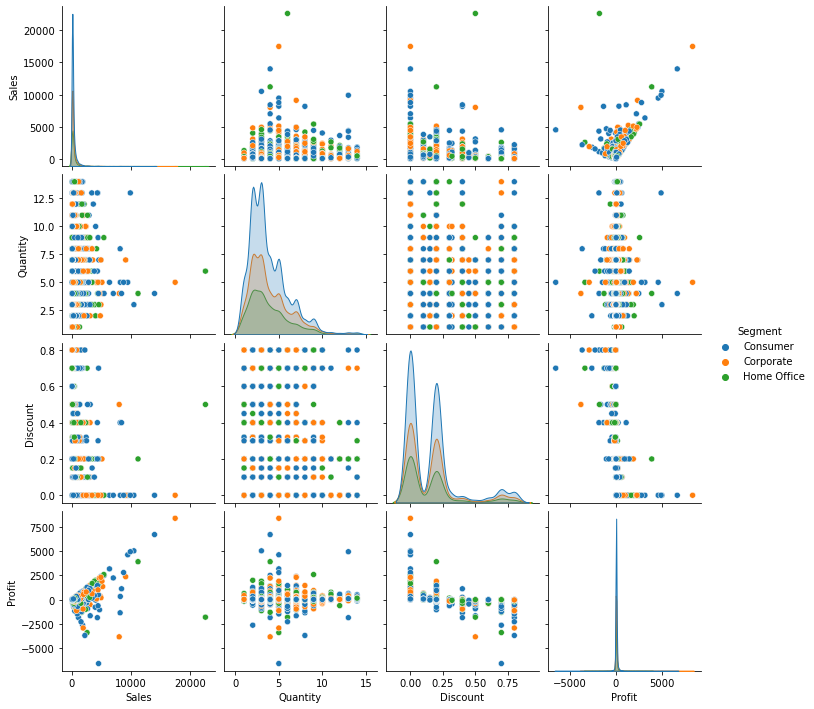

In [19]:
sns.pairplot(data1, hue='Segment')

In [20]:
data1['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

<AxesSubplot:xlabel='Segment', ylabel='count'>

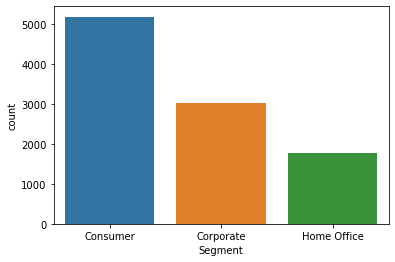

In [21]:
sns.countplot(x=data1['Segment'])

### Pair Plot of 'Category'

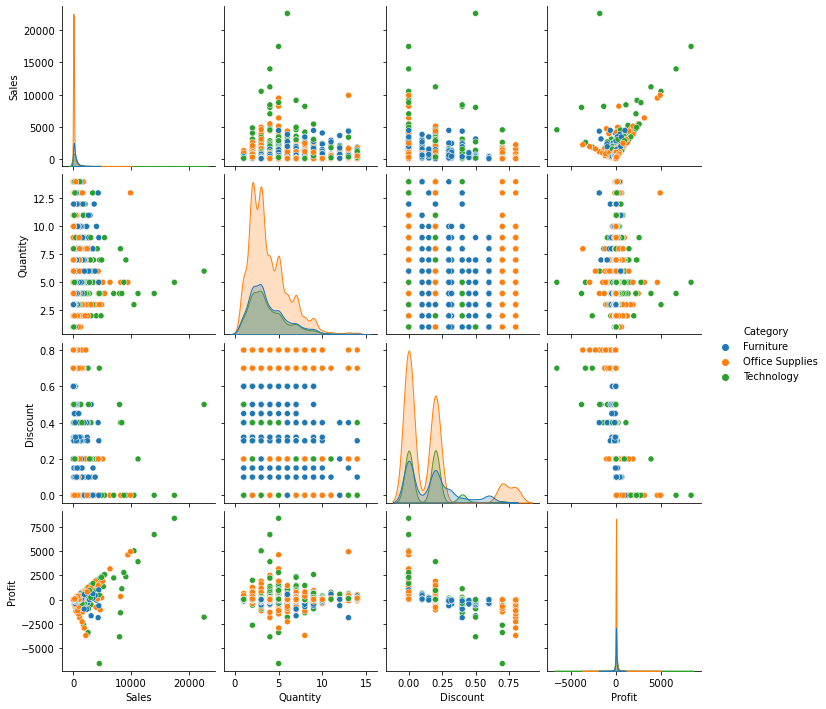

In [22]:
sns.pairplot(data1, hue='Category')

In [23]:
data1['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

<AxesSubplot:xlabel='Category', ylabel='count'>

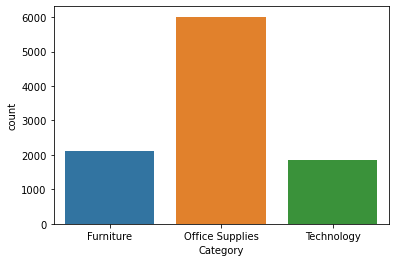

In [24]:
sns.countplot(x=data1['Category'])

### Pie Plot of 'Sub-Category'

In [25]:
data1['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

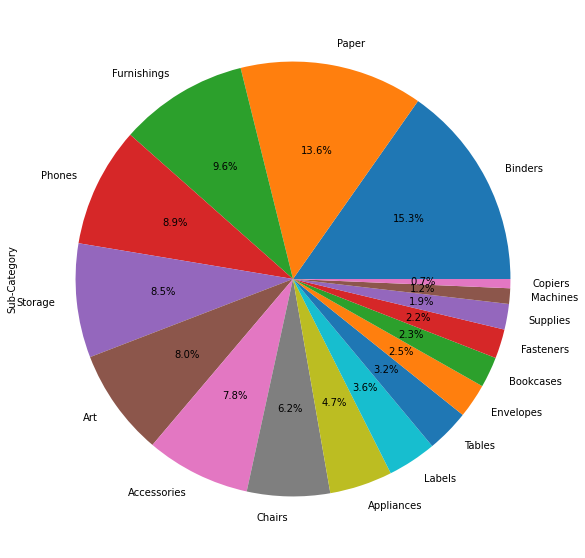

In [26]:
plt.figure(figsize=(10,10))
data1['Sub-Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Comparsion of Category VS Sub-Category

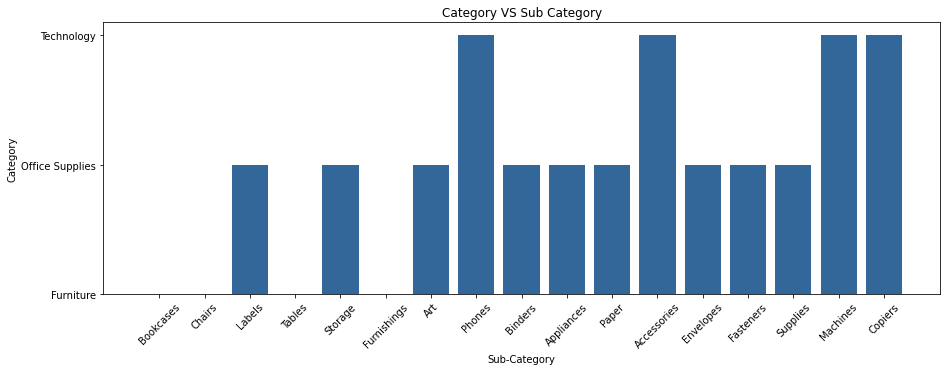

In [27]:
plt.figure(figsize=(15,5))

plt.bar('Sub-Category', 'Category', data=data1, color=(0.2,0.4,0.6,0.1))

plt.title(BAR_CHART_TITLE)
plt.xlabel(LBL_SUB_CATEGORY)
plt.ylabel(LBL_CATEGORY)

plt.xticks(rotation=45)

plt.show()

### Bar Chart of 'States'

In [28]:
data1['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Virginia                 224
Arizona                  224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Oklahoma                  66
Missouri                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

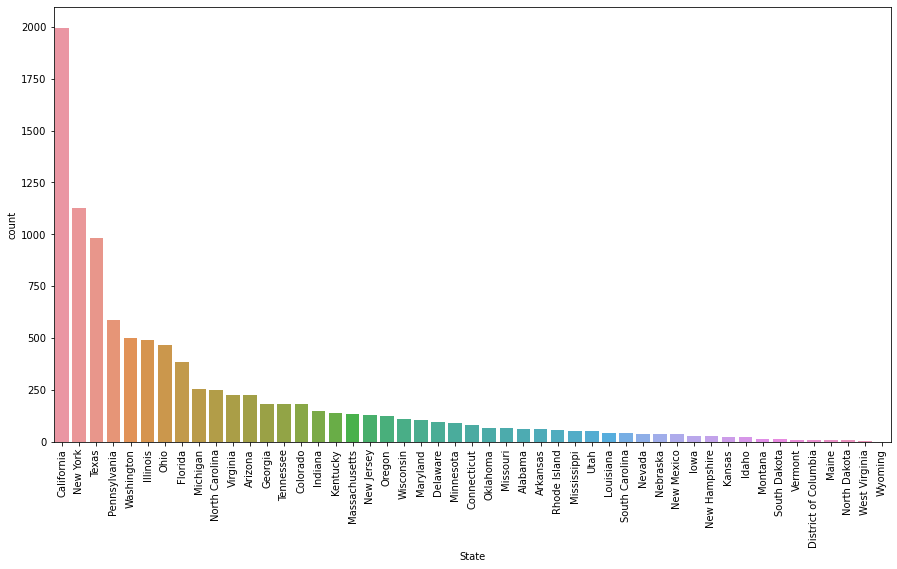

In [29]:
plt.figure(figsize=(15,8))

sns.countplot(x=data1['State'], order=data1['State'].value_counts().index)

plt.xticks(rotation=90)
plt.show()

### Pie Plot of 'Region'

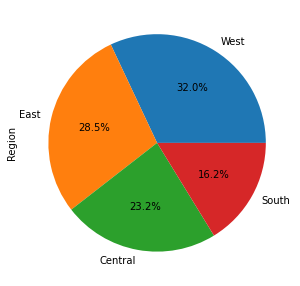

In [30]:
plt.figure(figsize=(5,5))
data1['Region'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

### Histogram

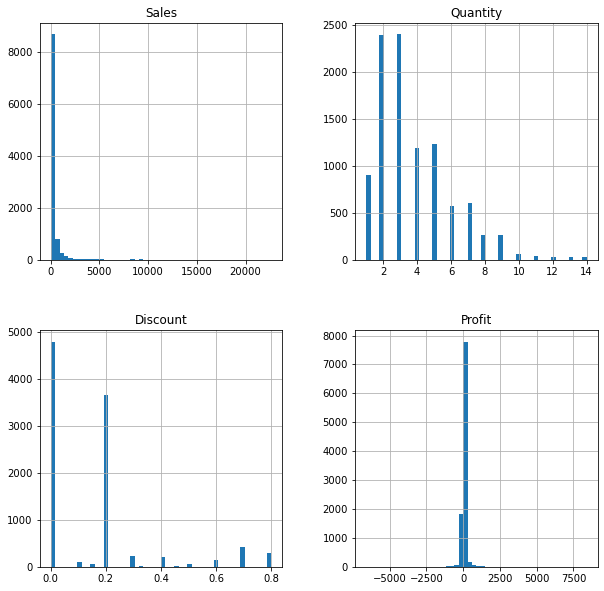

In [31]:
data1.hist(bins=50, figsize=(10,10))
plt.show()

# Step3: Summary

### Sales Summary

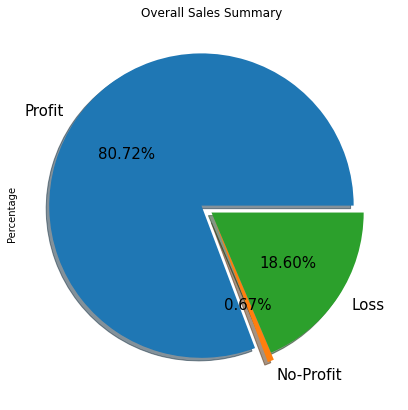

In [38]:
summary = pd.DataFrame(
    {'Profit': data1.Quantity[data1.Profit > 0].sum(),
     'No-Profit': data1.Quantity[data1.Profit == 0].sum(),
     'Loss': data1.Quantity[data1.Profit < 0].sum()
    },
    index={'Count'}
).T

summary.Count.plot.pie(autopct='%1.2f%%', figsize=(7,7), 
                       label='Percentage', textprops = {'fontsize': 15},
                       shadow=True, explode=(0.08,0.05,0))

plt.title(TITLE_SALES_SUMMARY)
plt.show()

### Profit Analysis

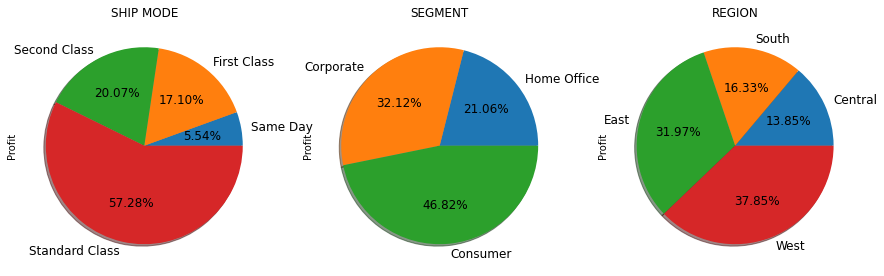

In [39]:
profit_shipmode = pd.DataFrame(data1.groupby('Ship Mode').sum()).sort_values('Profit')
profit_segment = pd.DataFrame(data1.groupby('Segment').sum()).sort_values('Profit')
profit_region = pd.DataFrame(data1.groupby('Region').sum()).sort_values('Profit')

# Setting plot features
fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)

profit_shipmode.Profit.plot.pie(autopct='%1.2f%%', textprops = {'fontsize': 12},
                                shadow=True, ax=ax[0])
profit_segment.Profit.plot.pie(autopct='%1.2f%%', textprops = {'fontsize': 12},
                                shadow=True, ax=ax[1])
profit_region.Profit.plot.pie(autopct='%1.2f%%', textprops = {'fontsize': 12},
                                shadow=True, ax=ax[2])

plt.show()

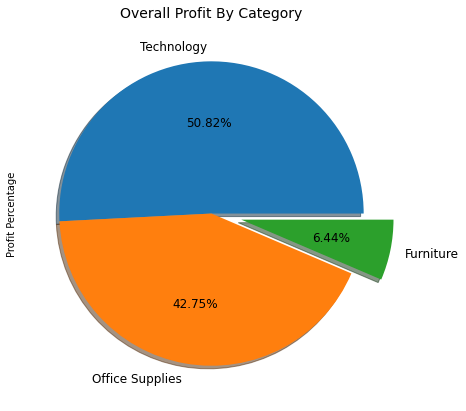

In [41]:
category = np.round(data1.groupby('Category').sum(), decimals=2).sort_values('Profit', ascending = False)

plt.title(TITLE_PROFIT_BY_CAT, fontsize=14)

category.Profit.plot.pie(autopct='%1.2f%%', figsize=(7,7), label='Profit Percentage',
                         textprops = {'fontsize': 12}, shadow=True, explode=(0,0,0.2))

plt.show()

Total items sold: 37820


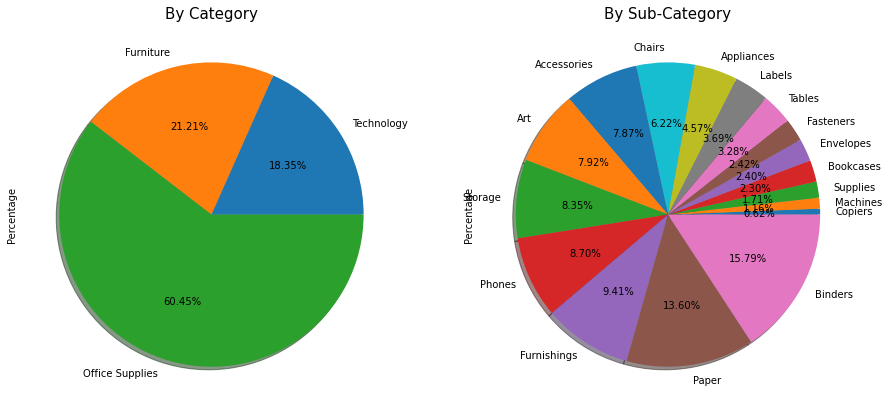

In [44]:
category = data1.groupby('Category').sum().iloc[:,1].sort_values().to_frame('Count')
sub_category = data1.groupby('Sub-Category').sum().iloc[:,1].sort_values().to_frame('Count')

print(f'Total items sold: {data1.Quantity.sum()}')

fig, ax = plt.subplots(1,2, figsize=(15,10))
ax[0].set_title('By Category', fontsize=15)
ax[1].set_title('By Sub-Category', fontsize=15)

category.Count.plot.pie(autopct='%1.2f%%',label='Percentage',radius=1,shadow=True, ax=ax[0])
sub_category.Count.plot.pie(autopct='%1.2f%%',label='Percentage',radius=1,shadow=True, ax=ax[1])

plt.show()